In [1]:
from synthetic_data import generateRandomData

In [2]:
from tqdm import tqdm

from greedy_algorithms import simpleGreedy, powerGreedy
from random_algorithms import bestSample, randomVicinity
from optimization_problems import CloudStorageScheduling

possible_n = [5, 10, 25, 50]

sg_values = []
pg_values = []
bs_values = []
rv_values = []

for n in tqdm(possible_n):
    volumes, pools = generateRandomData(n // 2, n, [10, 20, 100], [30, 40, 100])
    added_volumes, _ = generateRandomData(n, 0, [3, 5, 10], [None, None, None])
    volumes += added_volumes
    opt = CloudStorageScheduling(volumes, pools, [0.7, 1, 1])
    sg = simpleGreedy(opt, opt.getSpace())
    pg = powerGreedy(opt, opt.getSpace())
    bs = bestSample(opt, opt.getSpace())
    rv = randomVicinity(opt, opt.getSpace())

    sg_values.append(opt.f(sg, add_volumes=False))
    pg_values.append(opt.f(pg, add_volumes=False))
    bs_values.append(opt.f(bs, add_volumes=False) if bs else 0)
    rv_values.append(opt.f(rv, add_volumes=False))

100%|██████████| 4/4 [04:08<00:00, 62.14s/it]


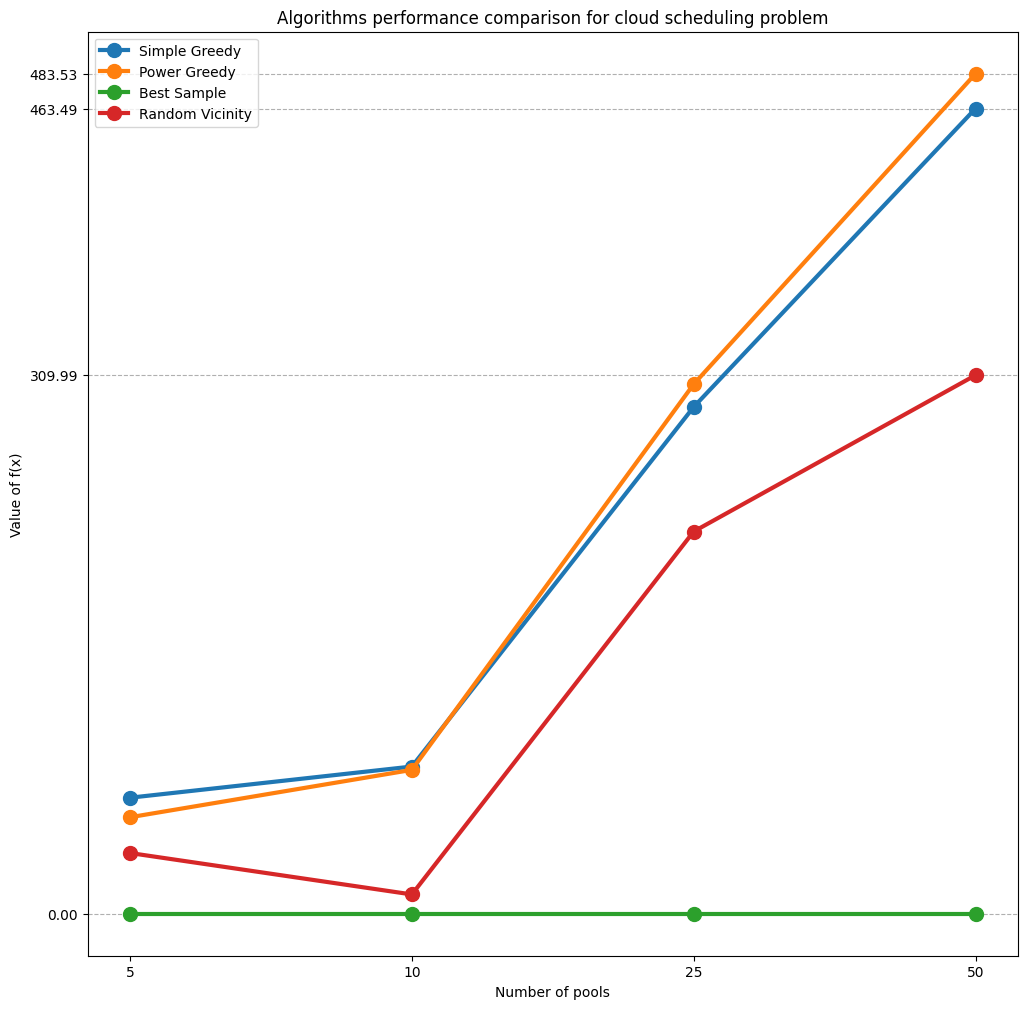

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 12))
str_n = [str(n) for n in possible_n]
for y, label in [
    (sg_values, "Simple Greedy"),
    (pg_values, "Power Greedy"),
    (bs_values, "Best Sample"),
    (rv_values, "Random Vicinity"),
]:
    plt.plot(str_n, y, marker="o", markersize=10, linewidth=3, label=label)

y_ticks = [
    sg_values[-1],
    pg_values[-1],
    bs_values[-1],
    rv_values[-1],
]

plt.title("Algorithms performance comparison for cloud scheduling problem")
plt.xlabel("Number of pools")
plt.ylabel("Value of f(x)")
plt.legend()
ax.set_yticks(y_ticks)
ax.set_yticklabels([f"{y:.2f}" for y in y_ticks])
ax.grid(axis='y', linestyle="--")
# ax.set_xscale('log')
# ax.set_xticks(possible_n)
plt.savefig("data/pictures/synthetic_data_benchmark.png")
plt.show()